# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [48]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# choose the appropriate code

from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve


In [49]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [50]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data copy/auto-mpg.csv")

In [51]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


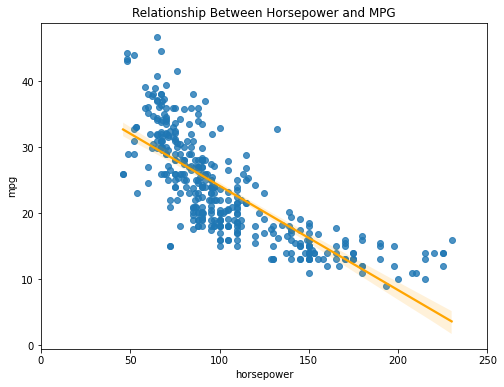

In [52]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images%20copy/slope-rss-relationship.png)

In [53]:
# call_on_students(1)

#### Answer: 

- Its showing the rideual sum of square on Y axis, slope in X axis, its show witch slope has the lowest amount of error
- Plot shows the error (RSS) on the y-axis and the slope of the model on the x-axis
- From this graph you can see that it arrived at about `m = -0.158` for the optimal coefficient value, since it's around that point that the error term (RSS) is smallest

### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

# call_on_students(1)

"""Make a randaom guess at where the function attains its minimum value
Calculate the gradient/derivative at that point
Use that value to decide how to make your next guess!
Repeat until we get the derivative as close as we like to 0.
If we want to improve our guess at the minimum of our loss function, we'll move in the opposite direction of the gradient away from our last guess. Hence we are using the gradient of our loss function to descend to the minimum value of the relevant loss function.
"""

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

#### Answer: 

- smaller step more expensive, too big step, youll miss the opitmal min RSS
- Step size captures the amount to change the coefficient as it tries to minimize the error term
- Learning rate determines how large those steps are to start
- step size = learning rate * slope



## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [55]:
# call_on_students(1)
"""
4a. Clasfification models, so categorical varaibel/targets
4b. The probability of our input belonging to the class labeled with 1 or another for 0, if its binary.
4c. Linear Regression is used to find a continuous target, Logistic regression is used to handle the classification problems.
4d. The logistic regression model is parametric because it has a finite set of parameters."""

'\n4a. Clasfification models, so categorical varaibel/targets\n4b. The probability of our input belonging to the class labeled with 1 or another for 0, if its binary.\n4c. Linear Regression is used to find a continuous target, Logistic regression is used to handle the classification problems.\n4d. The logistic regression model is parametric because it has a finite set of parameters.'

#### Answer: 


-4a. Clasfification models, so categorical varaibel/targets

-4b. The probability of our input belonging to the classes.

-4c. Linear Regression is used used to find a continuous target, and is not bound between 0 and 1 where as Logistic regression is used to handle the classification problems.

-4d. The logistic regression model is parametric because it has a finite set of parameters.

- Used for classification problems (categorical targets)
- Log-odds, which are translated into probabilities
- Linear regression predicts a continuous target, and is not bound between 0 and 1
- Parametric

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [56]:
# call_on_students(1)
'KNN vs. Logistics Regression'

'KNN vs. Logistics Regression'

#### Answer: 

-  Logistic Regression is comparatively faster than KNN
- KNN supports non-linear solutions where LR supports only linear solutions. 


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [57]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data copy/auto-mpg-classification.csv')

In [58]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [59]:
# call_on_students(1)

In [60]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target',axis=1)
y = mpg_class['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size = 0.33)

In [61]:
# Scale the data
ss = StandardScaler()
s_X_train = ss.fit_transform(X_train)
s_X_test = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [62]:
# call_on_students(1)
"model-less baseline = distrubtion of a target variable, it can be 0 or 1"

'model-less baseline = distrubtion of a target variable, it can be 0 or 1'

#### Part 1: explore the target column breakdown in train data

In [63]:
# Code to explore
y_train.value_counts(normalize = True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- Imbalanced target - 74% of training data is in class 0


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Predicting only our majority class, 0


#### Part 3: How accurate would that baseline be on test data?


In [64]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

-  75 % accurate on test data


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [65]:
# call_on_students(1)

#### Answer:

- Target is imbalanced
- Oversampling, synthetic oversampling (SMOTE), set `class_weight`
- Note that undersampling doesn't make sense here, since our dataset is so small


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [66]:
# call_on_students(1)

In [67]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(s_X_train,y_train)
y_pred = logreg.predict(s_X_test)

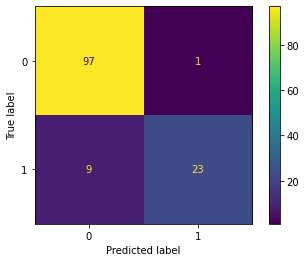

In [68]:
# Plot a confusion matrix on the test data
ct = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(ct).plot();

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [69]:
# Accuracy
accuracy_score(y_test, y_pred)

0.9230769230769231

In [70]:
# Precision
precision_score(y_test, y_pred)


0.9583333333333334

In [71]:
# Recall
recall_score(y_test, y_pred)

0.71875

In [72]:
# F1-Score
f1_score(y_test, y_pred)

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [73]:
# Calculate roc-auc
y_score = logreg.fit(s_X_train,y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc(fpr, tpr)

NameError: name 'roc_curve' is not defined

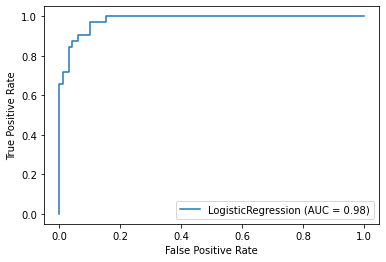

In [74]:
# Plot the ROC curve
plot_roc_curve(logreg, s_X_test, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [75]:
# call_on_students(1)

#### Answer:

- our model is doing really well


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [241]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

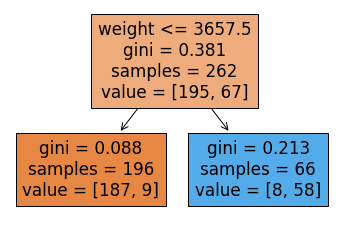

In [242]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

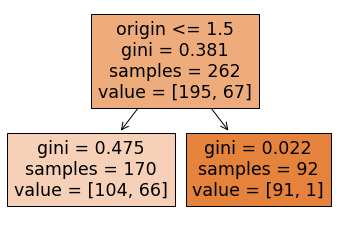

In [243]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images%20copy/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images%20copy/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [32]:
# call_on_students(1)
(0.088 + 0.213)/2

0.1505

In [33]:
(0.475 + 0.022)/2

0.2485

#### Answer:

- the first tree because the gini index is lower in the first tree compared the second tree


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [246]:
# call_on_students(1)

In [34]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)

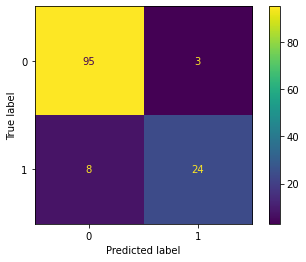

In [37]:
# Plot a confusion matrix on the test data
dt.fit(s_X_train,y_train)
dt_y_pred = dt.predict(s_X_test)
ct_dt = confusion_matrix(y_test, dt_y_pred)
pt_dt = ConfusionMatrixDisplay(ct_dt)
pt_dt.plot();

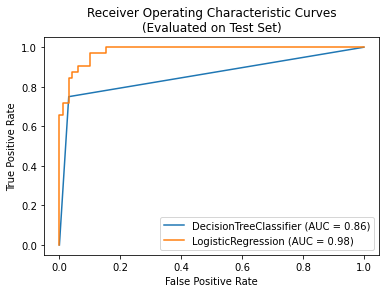

In [38]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()

plot_roc_curve(dt, s_X_test, y_test, ax=ax)
plot_roc_curve(logreg, s_X_test, y_test, ax=ax)
 
# or 
    
# RocCurveDisplay.from_estimator(dt, s_X_test, y_test, ax=ax)
# RocCurveDisplay.from_estimator(logreg, s_X_test, y_test, ax=ax)


plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.89      0.75      0.81        32

    accuracy                           0.92       130
   macro avg       0.91      0.86      0.88       130
weighted avg       0.91      0.92      0.91       130



### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [165]:
# call_on_students(1)

#### Answer:

- logistic was better because it was higer
